In [175]:
import numpy as np
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time

In [2]:
seed = 1

In [59]:
'''
    This function creates data in which 50% of the data is focussed around -2 and 50% is focussed around +2
'''
def get_dataset(n, d, random_state = 0):
    rs = np.random.RandomState(random_state)
    X = np.row_stack([(rs.rand(int(n / 2), d) * 2) - 3, (rs.rand(int(n / 2), d) * 2) + 1])
    y = X[:,0] < 0
    return X, y
    
X, y = get_dataset(10**4, 1, random_state = seed)

In [60]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state = seed)

'''
    now set the first `n_border` values in the trianing data to 0, and
    associate half of them with the negative and half of them with the positive label.
    The consequence is that the true limit distribution for the value 0 is 0.5 for both classes.
'''
n_border = 10**3
split_point = int(n_border / 2)
X_train[:split_point,0] = 0
X_train[split_point:n_border] = X_train[0]
y_train[:split_point] = 0
y_train[split_point:n_border] = 1

# now switch `n_ambiguous` instances in the *test* data to 0 and set the correct answer to the negative class.
#n_ambiguous = 100
X_test[:] = X_train[0]
y_test[:] = y_train[0]

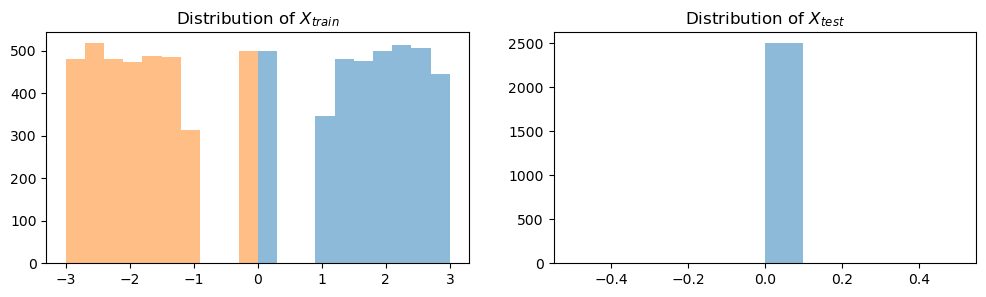

In [61]:
def plot_conditional_dist(X, y, ax):
    labels = np.unique(y)
    for label in labels:
        mask = y == label
        ax.hist(X[mask], alpha=0.5)
    
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
plot_conditional_dist(X_train, y_train, axs[0])
axs[0].set_title("Distribution of $X_{train}$")
plot_conditional_dist(X_test, y_test, axs[1])
axs[1].set_title("Distribution of $X_{test}$")
plt.show()

## build a forest with 1 million trees and observe how probs and error rate evolve

In [17]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators = 0, random_state = seed, warm_start = True)
step_size = 10**3
y_hat = 0
hist_score = []
hist_probs = []
for t in tqdm(range(10000)):
    rf.n_estimators += step_size
    rf.fit(X_train, y_train)
        
    y_hat *= (t * step_size)
    for estimator in rf.estimators_[-step_size:]:
        y_hat += estimator.predict_proba(X_test)
    y_hat /= ((t + 1) * step_size)
    
    score = np.count_nonzero(y_test == np.round(y_hat[:,1]).astype(int)) / len(y_hat)
    hist_score.append(score)
    hist_probs.append(y_hat[0,0])
    print(rf.n_estimators, y_hat[0,0], score)

  0%|          | 0/10000 [00:00<?, ?it/s]

1000 0.49975786562675917 0.0
2000 0.4987637664254272 0.0
3000 0.4987689805192439 0.0
4000 0.4989533204009962 0.0
5000 0.4989058482724472 0.0
6000 0.4990433240028624 0.0
7000 0.49917915777794497 0.0
8000 0.49926319113295464 0.0
9000 0.49933218289172093 0.0
10000 0.4992753146663608 0.0
11000 0.4994048205076753 0.0
12000 0.49932276842915707 0.0
13000 0.4994090172578233 0.0
14000 0.4994202897870028 0.0
15000 0.4994584907560255 0.0
16000 0.4994110844254629 0.0
17000 0.49947670682006967 0.0
18000 0.4995016952258792 0.0
19000 0.49941222804945334 0.0
20000 0.4994188171394712 0.0
21000 0.4994702706899558 0.0
22000 0.4995053996842931 0.0
23000 0.49950983435569274 0.0
24000 0.49957721639849123 0.0
25000 0.4995981209549586 0.0
26000 0.499630076041425 0.0
27000 0.4996955854859936 0.0
28000 0.4996741808445462 0.0
29000 0.49970213613710945 0.0
30000 0.4997630810467346 0.0
31000 0.4997269893581963 0.0
32000 0.49974195819898815 0.0
33000 0.4997444281734456 0.0
34000 0.49975865590281127 0.0
35000 0.4997

275000 0.49991747604184655 0.0
276000 0.4999203365196919 0.0
277000 0.49992341362408144 0.0
278000 0.4999199828297894 0.0
279000 0.4999155283651147 0.0
280000 0.4999159164115438 0.0
281000 0.49992618212407114 0.0
282000 0.49993110405037405 0.0
283000 0.4999329006703089 0.0
284000 0.49993086890100996 0.0
285000 0.4999381080892674 0.0
286000 0.499935127261144 0.0
287000 0.4999326121405782 0.0
288000 0.4999340259782563 0.0
289000 0.4999292566245893 0.0
290000 0.4999270091206008 0.0
291000 0.49993119276524384 0.0
292000 0.49993455318199476 0.0
293000 0.4999322780683007 0.0
294000 0.49993540084567895 0.0
295000 0.49993401488249684 0.0
296000 0.4999320080096457 0.0
297000 0.49992856982986844 0.0
298000 0.4999323944859901 0.0
299000 0.49993210907749297 0.0
300000 0.4999263624859709 0.0
301000 0.49992336725277786 0.0
302000 0.49992030710271484 0.0
303000 0.4999210294805138 0.0
304000 0.4999213385077497 0.0
305000 0.49991593767170245 0.0
306000 0.49991600119334334 0.0
307000 0.4999091345687278 

545000 0.49998749974153345 0.0
546000 0.49998769557542255 0.0
547000 0.49998816686227754 0.0
548000 0.499985170012486 0.0
549000 0.4999854343096152 0.0
550000 0.4999869412750827 0.0
551000 0.4999870228504926 0.0
552000 0.4999898075200881 0.0
553000 0.49998926362709595 0.0
554000 0.4999897938039252 0.0
555000 0.4999888571067093 0.0
556000 0.4999900525904695 0.0
557000 0.4999895581072324 0.0
558000 0.49998885384875563 0.0
559000 0.49999131824414966 0.0
560000 0.4999902171720337 0.0
561000 0.49999423578551555 0.0
562000 0.4999969858738555 0.0
563000 0.4999981234730826 0.0
564000 0.4999972599779476 0.0
565000 0.49999888061557934 0.0
566000 0.4999983691271463 0.0
567000 0.49999695949038425 0.0
568000 0.49999780184992404 0.0
569000 0.49999996129306773 0.0
570000 0.5000004163896022 1.0
571000 0.5000025651630721 1.0
572000 0.5000028269371141 1.0
573000 0.5000029240097947 1.0
574000 0.5000043072996019 1.0
575000 0.500004229258654 1.0
576000 0.5000058328668683 1.0
577000 0.500006536906136 1.0
57

816000 0.4999862982818159 0.0
817000 0.499986815901778 0.0
818000 0.4999882978803215 0.0
819000 0.4999901026826412 0.0
820000 0.49999037753113046 0.0
821000 0.49998894140685185 0.0
822000 0.4999891555039826 0.0
823000 0.4999903133186653 0.0
824000 0.4999903001196315 0.0
825000 0.4999877718473735 0.0
826000 0.4999864840673844 0.0
827000 0.4999869165484696 0.0
828000 0.4999856220651497 0.0
829000 0.49998426388201317 0.0
830000 0.4999861940236095 0.0
831000 0.49998526512924485 0.0
832000 0.49998416112037525 0.0
833000 0.4999841201448945 0.0
834000 0.49998313128255406 0.0
835000 0.4999816000975497 0.0
836000 0.4999795709442979 0.0
837000 0.49997686901092725 0.0
838000 0.49997494589853814 0.0
839000 0.49997411187601826 0.0
840000 0.49997483578047175 0.0
841000 0.49997531773056836 0.0
842000 0.4999731158253987 0.0
843000 0.49997366478276783 0.0
844000 0.49997105388621316 0.0
845000 0.4999723930356457 0.0
846000 0.4999725009416559 0.0
847000 0.49997308347517094 0.0
848000 0.4999742966399541 0

1085000 0.5000003131113271 1.0
1086000 0.49999998160514414 0.0
1087000 0.49999997066066415 0.0
1088000 0.5000001992144291 1.0
1089000 0.5000004258714771 1.0
1090000 0.5000015028850805 1.0
1091000 0.5000018782481214 1.0
1092000 0.500002559114948 1.0
1093000 0.5000052931987856 1.0
1094000 0.5000047086935512 1.0
1095000 0.5000035359281715 1.0
1096000 0.500003650029051 1.0
1097000 0.500005369810615 1.0
1098000 0.500005762882381 1.0
1099000 0.5000069836327239 1.0
1100000 0.5000051720240289 1.0
1101000 0.5000069804124703 1.0
1102000 0.500006879738281 1.0
1103000 0.5000073109932518 1.0
1104000 0.5000057118656983 1.0
1105000 0.500005919250564 1.0
1106000 0.500006364407329 1.0
1107000 0.5000064761980906 1.0
1108000 0.5000069300544874 1.0
1109000 0.5000066069644297 1.0
1110000 0.5000061515557865 1.0


KeyboardInterrupt: 

In [68]:
%%time
rf = sklearn.ensemble.RandomForestClassifier(n_estimators = 10**4, random_state = seed, n_jobs=8)
rf.fit(X_train, y_train)

CPU times: user 37.5 s, sys: 3.32 s, total: 40.8 s
Wall time: 21.8 s


RandomForestClassifier(n_estimators=10000, n_jobs=8, random_state=1)

In [190]:
tree_scores = np.array([tree.predict(X_test) != y_test for tree in rf.estimators_])

In [219]:
tree_scores[17].mean()

0.0

In [266]:
def get_mean_score_estimate(t, num_samples = 50):
    samples = []
    for i in range(num_samples):
        scores_for_classifier = tree_scores[np.random.choice(range(tree_scores.shape[0]), t)]
        samples.append(scores_for_classifier.mean())
    return np.mean(samples)

samples = [get_mean_score_estimate(1, num_samples=10) for i in tqdm(range(10**2))]

  0%|          | 0/100 [00:00<?, ?it/s]

In [267]:
np.std(samples)

0.16767826334978544

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0., 17.,
         0.,  0.,  0.,  0.,  0., 17.,  0.,  0.,  0.,  0.,  0.,  0., 21.,
         0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.,  0., 10.,  0.,
         0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.1  , 0.116, 0.132, 0.148, 0.164, 0.18 , 0.196, 0.212, 0.228,
        0.244, 0.26 , 0.276, 0.292, 0.308, 0.324, 0.34 , 0.356, 0.372,
        0.388, 0.404, 0.42 , 0.436, 0.452, 0.468, 0.484, 0.5  , 0.516,
        0.532, 0.548, 0.564, 0.58 , 0.596, 0.612, 0.628, 0.644, 0.66 ,
        0.676, 0.692, 0.708, 0.724, 0.74 , 0.756, 0.772, 0.788, 0.804,
        0.82 , 0.836, 0.852, 0.868, 0.884, 0.9  ]),
 <BarContainer object of 50 artists>)

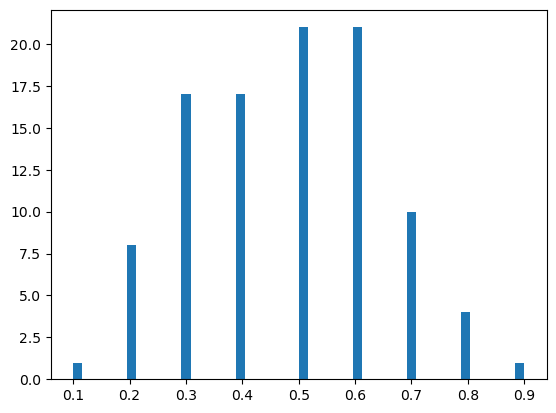

In [268]:
plt.hist(samples, bins=50)

In [30]:
mean_scores_per_data_point = tree_scores.mean(axis=0)
mean_scores_per_data_point

array([0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
       0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941, 0.4941,
      

In [31]:
mean_scores_overall = mean_scores_per_data_point.mean()
mean_scores_overall

0.49409999999999993

(array([5059.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4941.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

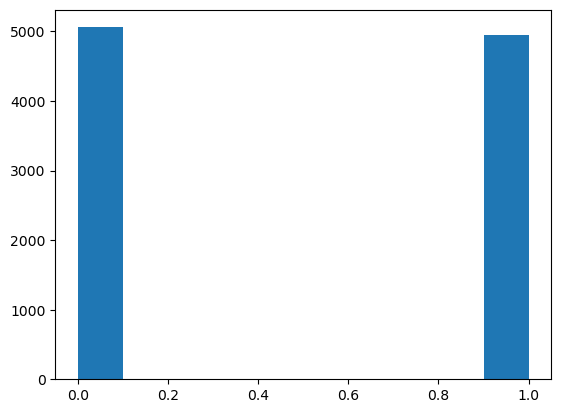

In [25]:
plt.hist(tree_scores)